<a href="https://colab.research.google.com/github/MuskaansGithup/Bankruptcy_Prediction/blob/main/Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMORTING LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

**LOADING THE DATASET**

In [ ]:
df= pd.read_csv('bankruptcy_data.csv')
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


**FINANCIAL RATIOS COLUMNS HEADING**

In [ ]:
col= ["net profit / total assets","total liabilities / total assets", "working capital / total assets","current assets / short-term liabilities",
      "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365","retained earnings / total assets",
      "EBIT / total assets","book value of equity / total liabilities","sales / total assets","equity / total assets","(gross profit + extraordinary items + financial expenses) / total assets",
      "gross profit / short-term liabilities","(gross profit + depreciation) / sales","(gross profit + interest) / total assets","(total liabilities * 365) / (gross profit + depreciation)",
      "(gross profit + depreciation) / total liabilities,","total assets / total liabilities","gross profit / total assets","gross profit / sales","(inventory * 365) / sales",
      "sales (n) / sales (n-1)","profit on operating activities / total assets","net profit / sales","gross profit (in 3 years) / total assets","(equity - share capital) / total assets",
      "(net profit + depreciation) / total liabilities","profit on operating activities / financial expenses","working capital / fixed assets","logarithm of total assets",
      "(total liabilities - cash) / sales","(gross profit + interest) / sales","(current liabilities * 365) / cost of products sold","operating expenses / short-term liabilities",
      "operating expenses / total liabilities","profit on sales / total assets","total sales / total assets","(current assets - inventories) / long-term liabilities","constant capital / total assets",
      "profit on sales / sales","(current assets - inventory - receivables) / short-term liabilities","total liabilities / ((profit on operating activities + depreciation) * (12/365))",
      "profit on operating activities / sales","rotation receivables + inventory turnover in days","(receivables * 365) / sales","net profit / inventory","(current assets - inventory) / short-term liabilities",
      "(inventory * 365) / cost of products sold","EBITDA (profit on operating activities - depreciation) / total assets","EBITDA (profit on operating activities - depreciation) / sales",
      "current assets / total liabilities","short-term liabilities / total assets","(short-term liabilities * 365) / cost of products sold)","equity / fixed assets",
      "constant capital / fixed assets","working capital","(sales - cost of products sold) / sales","(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
      "total costs /total sales","long-term liabilities / equity","sales / inventory","sales / receivables","(short-term liabilities *365) / sales","sales / short-term liabilities",
      "sales / fixed assets","class"]
df.columns = col
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


**UNDERSTANDING DATA STRUCTURE AND DATATYPES**

In [ ]:
print("Number of Records : ",df.shape[0],"\nNumber of Features : ",df.shape[1])

Number of Records :  10000 
Number of Features :  65


In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 65 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   net profit / total assets                                                                                            10000 non-null  float64
 1   total liabilities / total assets                                                                                     10000 non-null  float64
 2   working capital / total assets                                                                                       10000 non-null  float64
 3   current assets / short-term liabilities                                                                              10000 non-null  float64
 4   [(cash + sh

**MISSING VALUES**

In [ ]:
df.isnull().values.any()

False

**DESCRIPTIVE STATISTICS**

In [ ]:
df.describe().T.head(50)

,count,mean,std,min,25%,50%,75%,max
net profit / total assets,10000.0,0.007954,1.396405,-9.474787,-0.079776,-0.019204,0.081218,137.557872
total liabilities / total assets,10000.0,-0.007140,1.409440,-140.604555,-0.055604,0.000246,0.056957,2.004925
working capital / total assets,10000.0,-0.003544,1.015494,-25.597146,-0.516971,0.003186,0.585722,3.324327
current assets / short-term liabilities,10000.0,0.005005,0.908020,-0.381641,-0.192306,-0.117972,0.022705,60.825460
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,10000.0,-0.004687,1.394750,-138.720013,0.006798,0.007302,0.007753,11.556238
retained earnings / total assets,10000.0,0.001455,1.286713,-26.249562,-0.016047,-0.016047,0.016026,121.354736
EBIT / total assets,10000.0,-0.006963,1.412509,-141.176615,-0.008018,0.004280,0.024222,0.623095
book value of equity / total liabilities,10000.0,0.009053,1.064426,-0.966015,-0.445667,-0.260150,0.098874,47.504463
sales / total assets,10000.0,0.006763,1.171199,-1.294340,-0.388184,-0.307842,0.156638,62.936396
equity / total assets,10000.0,0.007456,1.407349,-2.528495,-0.068584,0.000253,0.070036,140.123299


**EXPLORATORY DATA ANALYSIS**

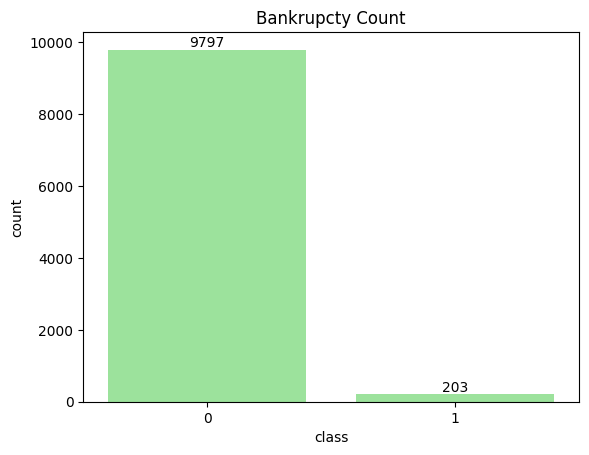

In [ ]:
#PLOT THE DISTRIBUTION OF TARGET VALUE
bankrupt_counts = df['class'].value_counts()
sns.countplot(x='class', data=df, color= "lightgreen")
plt.title('Bankrupcty Count')
for index, value in enumerate(bankrupt_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

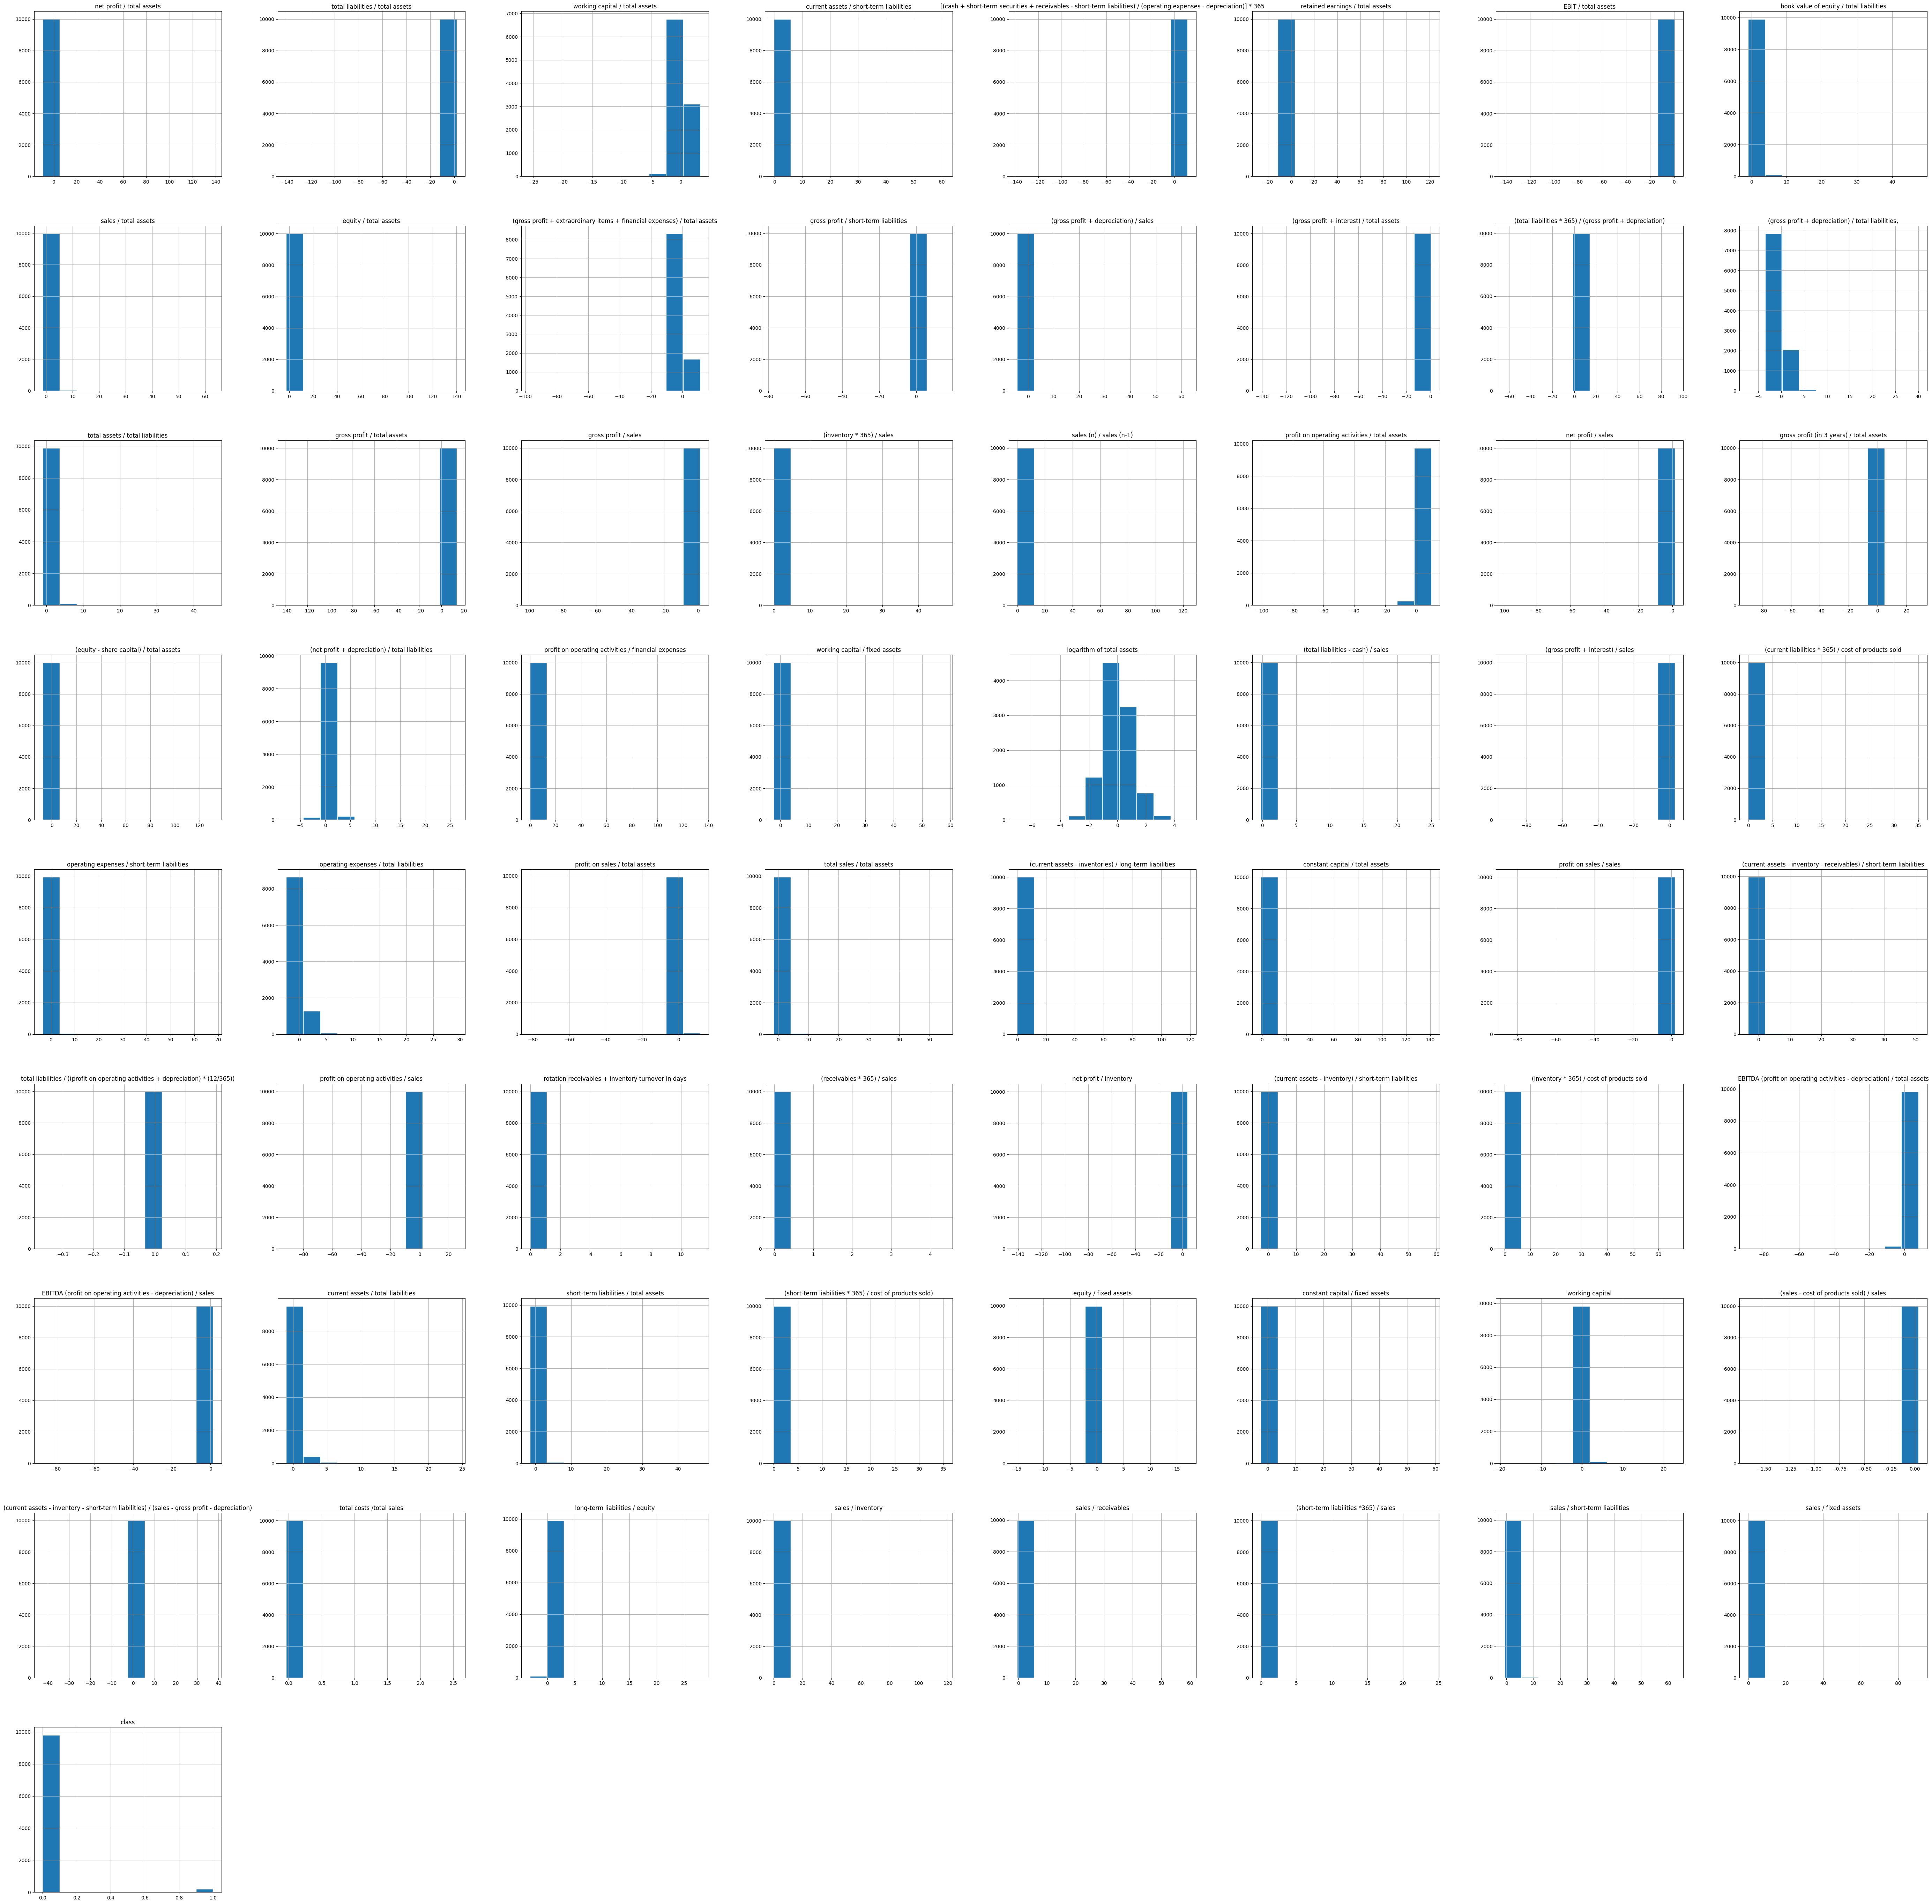

In [ ]:
# PLOT HISTOGRAM FOR EACH VARIABLE
df.hist(figsize=(70,70), edgecolor='white')
plt.show()

In [ ]:
#CORRELATION ANALYSIS
corr_matrix=df.corr()
df.corr()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
net profit / total assets,1.000000,-0.987949,-0.194243,0.006111,0.000461,0.933216,-0.979409,0.019567,0.505138,0.988837,...,0.021253,0.005370,0.019909,-0.004793,-0.000540,0.104045,-0.013103,0.028955,0.000524,-0.016942
total liabilities / total assets,-0.987949,1.000000,0.212366,-0.008573,-0.000496,-0.942975,0.996225,-0.026655,-0.485241,-0.999082,...,-0.010842,-0.001046,-0.030299,0.003571,0.001606,-0.096427,0.008741,-0.015457,0.002498,0.008025
working capital / total assets,-0.194243,0.212366,1.000000,0.303826,0.000644,-0.220603,0.262167,0.331339,-0.110010,-0.201081,...,0.150626,-0.015385,-0.150829,-0.019860,-0.013468,-0.099183,-0.131610,0.279461,0.021594,-0.075247
current assets / short-term liabilities,0.006111,-0.008573,0.303826,1.000000,0.001818,-0.001295,0.005174,0.258161,-0.021633,0.011814,...,0.010454,0.000931,-0.007739,-0.007447,-0.004134,-0.005630,-0.011325,0.605265,0.006728,-0.026396
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,0.000461,-0.000496,0.000644,0.001818,1.000000,0.000139,-0.000012,0.004383,0.038414,0.000547,...,0.001151,-0.000030,-0.000788,0.000456,0.000334,-0.004081,-0.000189,0.002861,-0.000086,0.001146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales / receivables,0.104045,-0.096427,-0.099183,-0.005630,-0.004081,0.092708,-0.094903,0.013057,0.111027,0.096277,...,0.003914,0.002279,-0.000275,-0.002187,-0.000064,1.000000,-0.007927,0.125277,-0.003931,-0.002448
(short-term liabilities *365) / sales,-0.013103,0.008741,-0.131610,-0.011325,-0.000189,-0.004989,-0.001947,-0.018836,-0.024778,-0.010893,...,-0.904219,0.000021,0.889397,0.001214,0.001168,-0.007927,1.000000,-0.022692,-0.000365,0.001475
sales / short-term liabilities,0.028955,-0.015457,0.279461,0.605265,0.002861,0.005123,0.006040,0.284472,0.152825,0.019966,...,0.019219,0.004353,-0.015523,-0.011071,-0.000005,0.125277,-0.022692,1.000000,0.001404,-0.038723
sales / fixed assets,0.000524,0.002498,0.021594,0.006728,-0.000086,-0.000888,0.000708,-0.013552,0.020201,-0.002885,...,0.000948,0.003999,-0.000932,-0.000495,0.000367,-0.003931,-0.000365,0.001404,1.000000,0.003204


In [ ]:
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    aspect='auto',
    color_continuous_scale='Viridis')

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=1400,
    height=1400,)

fig.show()

**MODEL BUILDING**

In [ ]:
# SPLITING THE DATASET
X= df.drop(['class'],axis=1)
y = df['class']

**HANDLING IMBALANCED DATA**

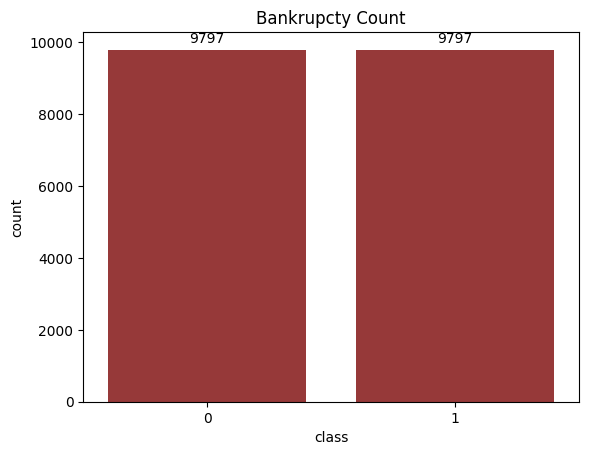

In [ ]:
# Create an instance of the SMOTE class
smote_instance = SMOTE(sampling_strategy='minority')

# Use the fit_resample method to perform oversampling
X_sm, y_sm = smote_instance.fit_resample(X, y)

# Check the class distribution after oversampling
plot =sns.countplot(x=y_sm, color = 'brown')
plt.title('Bankrupcty Count')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points')

plt.show()

**NORMALISE X VARIABLES**

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_sm)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,0.174004,-1.217268,0.221296,0.961169,0.341028,0.000000,0.096636,2.803086,-0.656687,1.308050,...,0.107305,3.474580,-0.075868,-3.334142,-0.219333,8.985232,-0.354039,-0.210409,0.263600,-0.522313
1,-1.143939,-0.830287,0.536899,0.526826,0.446706,0.000000,-1.002551,1.266053,0.922882,0.903155,...,0.049107,-0.909465,-0.855836,0.865044,-0.408213,0.584636,-0.315461,-0.345186,0.516775,0.362703
2,-0.004130,0.228164,-0.189072,-0.171982,-0.473169,0.000000,-0.051930,-0.174575,0.664249,-0.204291,...,-0.062810,0.826985,-0.001389,0.274027,0.912048,-0.236210,0.686739,0.022872,-0.031739,0.075548
3,-0.075064,0.039418,0.091798,0.146512,0.409751,0.589419,-0.072350,-0.192707,-0.058107,-0.311023,...,0.556470,0.725553,-0.080021,-0.802133,1.721093,-0.184469,-0.958556,1.597123,-0.691912,-0.523911
4,1.938213,-0.853063,0.879340,0.953751,0.802251,0.000000,1.923879,1.327022,0.862705,0.926986,...,0.562287,0.939206,1.041879,-0.967119,-0.359518,0.387323,-0.207750,-0.393254,0.630245,0.522999


**LOGISTIC REGRESSION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.4, random_state=42, stratify=y_sm)

# Fit the model on the training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the training and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

**EVALUATION MATRICES FOR TRAINING DATA**

Model Performance for Training Sets: 

ACCURACY SCORE:  0.8446750595440626
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      5878
           1       0.80      0.93      0.86      5878

    accuracy                           0.84     11756
   macro avg       0.85      0.84      0.84     11756
weighted avg       0.85      0.84      0.84     11756

CONFUSION MATRIX: 
 [[4473 1405]
 [ 421 5457]]


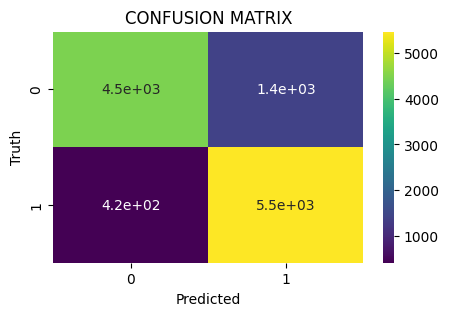

In [ ]:
# Calculate the metrices Training Sets
print("Model Performance for Training Sets: \n")
print("ACCURACY SCORE: ", metrics.accuracy_score(y_train, y_train_pred))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_train, y_train_pred))
log= metrics.confusion_matrix(y_train, y_train_pred)
print("CONFUSION MATRIX: \n",log)

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(log, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()

**EVALUATION MATRICES FOR TESTING DATA**

Model Performance for Testing Sets: 

ACCURACY SCORE:  0.8428170451645828
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      3919
           1       0.79      0.93      0.86      3919

    accuracy                           0.84      7838
   macro avg       0.85      0.84      0.84      7838
weighted avg       0.85      0.84      0.84      7838

CONFUSION MATRIX: 
 [[2971  948]
 [ 284 3635]]


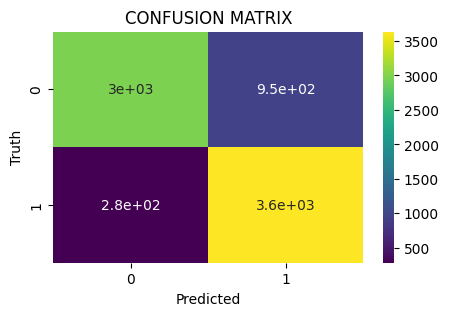

In [ ]:
# Calculate the metrices test sets
print("Model Performance for Testing Sets: \n")
print("ACCURACY SCORE: ", metrics.accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_test, y_test_pred))
log1= metrics.confusion_matrix(y_test, y_test_pred)
print("CONFUSION MATRIX: \n",log1)

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(log1, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()

**ROC-AUC CURVE**

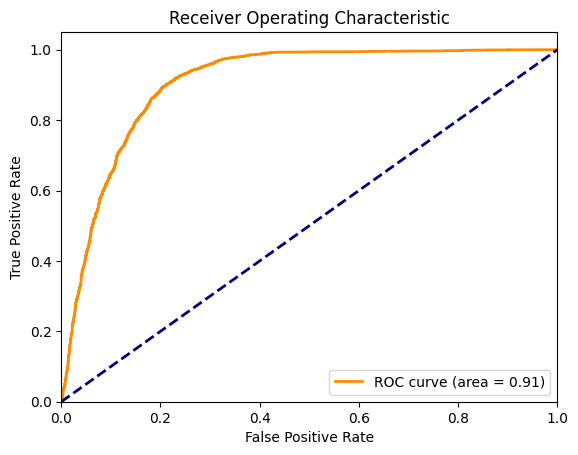

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**CHECK THE TEST QUALITY**

In [ ]:
scores = cross_val_score(logreg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8435818867776996


**RANDOM FOREST**



In [ ]:
# Fit the model on the training data
rand_forest= RandomForestClassifier(n_estimators=50,random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Predict on the training and test data
y_test_pred = rand_forest.predict(X_test)

**MODEL EVALUTION**

Model Performance for Testing Sets: 

ACCURACY SCORE:  0.985327889767798
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      3919
           1       0.98      1.00      0.99      3919

    accuracy                           0.99      7838
   macro avg       0.99      0.99      0.99      7838
weighted avg       0.99      0.99      0.99      7838

CONFUSION MATRIX: 
 [[3819  100]
 [  15 3904]]


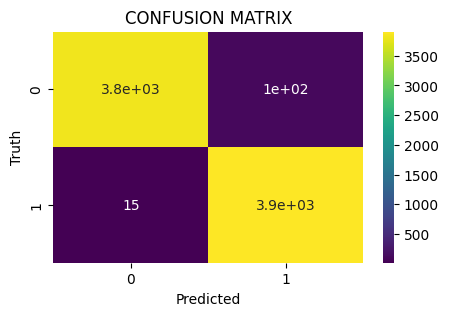

In [ ]:
# Calculate the metrices for test dataset
print("Model Performance for Testing Sets: \n")
print("ACCURACY SCORE: ", metrics.accuracy_score(y_test, y_test_pred))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_test, y_test_pred))
rand_forest1= metrics.confusion_matrix(y_test, y_test_pred)
print("CONFUSION MATRIX: \n",rand_forest1)

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(rand_forest1, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()

**AUC-ROC CURVE**

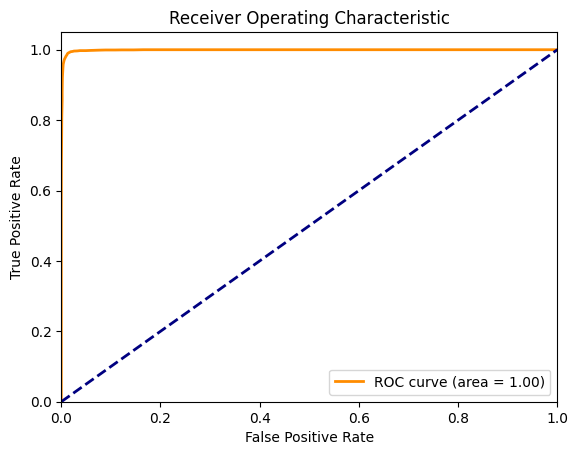

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = rand_forest.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(rand_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.974738707743634


**K NEAREST NEIGHBOUR**

In [ ]:
# FITTING KNN MODEL
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# PREDICTIONS ON TESTING DATASET
y_pred = knn.predict(X_test)

**MODEL EVALUATION**

CONFUSION MATRIX: 
 [[2994  925]
 [  19 3900]]
KNN score:  0.8795611125287063
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      3919
           1       0.81      1.00      0.89      3919

    accuracy                           0.88      7838
   macro avg       0.90      0.88      0.88      7838
weighted avg       0.90      0.88      0.88      7838



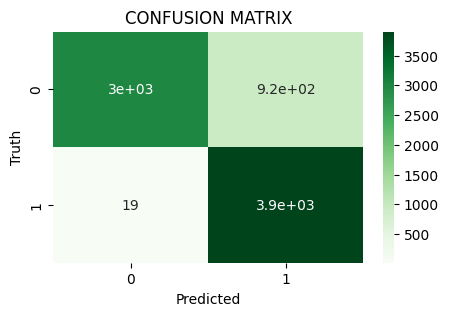

In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred)
cm=metrics.confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX: \n",cm)
print("KNN score: ",knn.score(X_test, y_test))
print("CLASSIFICATION REPORT: \n",metrics.classification_report(y_test, y_pred))

# PLOT
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True,cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("CONFUSION MATRIX")
plt.show()

**AUC-ROC CURVE**

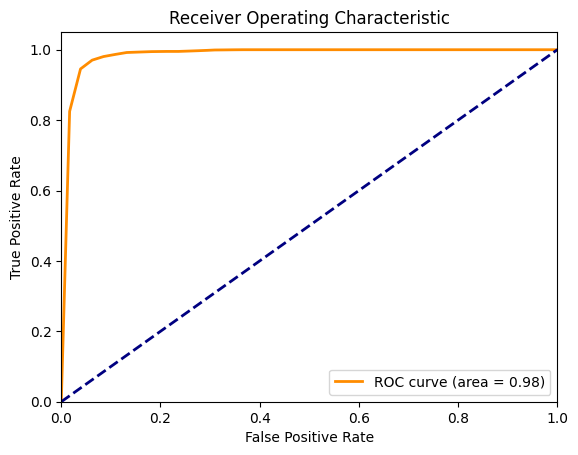

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores = cross_val_score(knn, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8676978262569394
